## 군집
* 군집(Clustering)은 데이터셋을 클러스터(Cluster)라는 그룹으로 나누는 작업입니다. 한 클러스터 안의 데이터 포인트끼리는 매우 비슷하고 다른 클러스터의 데이터 포인트와는 구분되도록 데이터를 나누는 것이 목표입니다.분류 알고리즘과 비슷하게 군집 알고리즘은 각 데이터 포인트가 어는 클러스터에 속하는지 할당(또는 예측)합니다.

### K-평균 군집
* K-평균(K-means)군집은 가장 간단하고 또 널리 사용하는 군집 알고리즘입니다. 이 알고리즘은 데이터의 어떤 영역을 대표하는 클러스터 중심(cluster center)을 찾습니다. 알고리즘은 두 단계를 반복합니다. 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고, 그런 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터 중심을 다시 지정합니다. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료됩니다. 다음은 예시용 데이터셋에 *k*-평균 군집을 적용한 예입니다.

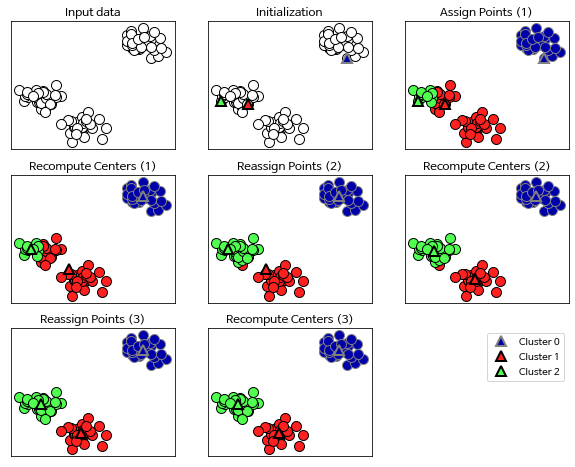

In [2]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

[입력 데이터와 *k*-평균 군집 알고리즘이 세 번 진행되기까지의 과정]

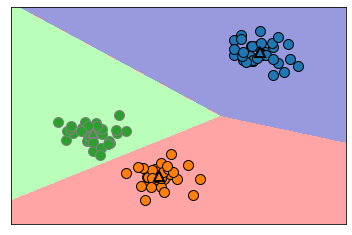

In [3]:
mglearn.plots.plot_kmeans_boundaries()

[*k*-평균 알고리즘으로 찾은 클러스터 중심과 클러스터 경계]

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 인위적으로 2차원 데이터를 생성합니다.
X, y = make_blobs(random_state=1)

# 군집 모델을 만듭니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [7]:
print("클러스터 레이블:\n{}".format(kmeans.labels_))

클러스터 레이블:
[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


In [9]:
print(kmeans.predict(X))

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


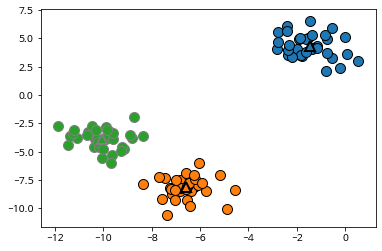

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
                         markers='^', markeredgewidth=2)

[*k*-평균 알고리즘으로 찾은 세 개의 클러스터 중심과 클러스터 할당(Three cluster centroids and cluster assignments found by the k-means algorithm)]

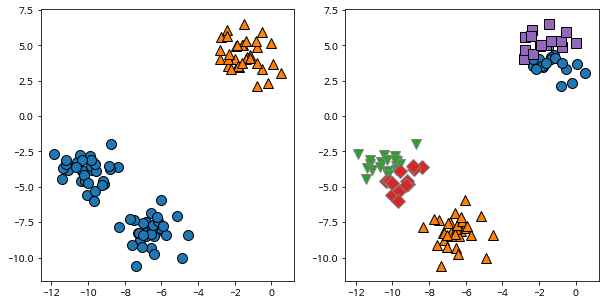

In [14]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 두 개의 클러스터 중심을 사용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# 
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

[*k*-평균 알고리즘으로 클러스터를 두 개 사용했을 때(왼쪽)와 다섯 개 사용했을 때(오른쪽)의 클러스터 할당(Cluster assignments by using two(left) or five(right) clusters with K-means algorithm)]

#### K-평균 알고리즘(K-Means algorithm)이 실패하는 경우

Text(0, 0.5, '특성 1')

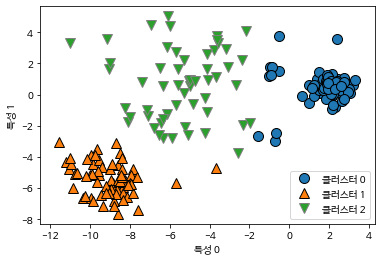

In [17]:
X_varied, y_varied = make_blobs(n_samples=200,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc='best')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[클러스터의 밀도가 다를 때 *k*-평균으로 찾은 클러스터 할당(assign clusters which found by K-Means when each cluster has different densities)]

Text(0, 0.5, '특성 1')

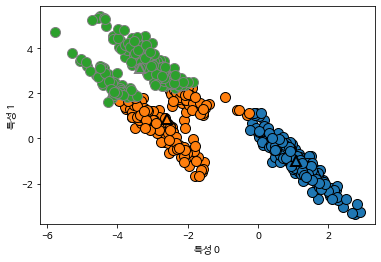

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import mglearn
# 무작위로 클러스터 데이터를 생성합니다.
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경합니다.
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# 세 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 나타냅니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
    markers='^', markeredgewidth=2)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[원형이 아닌 클러스터를 구분하지 못하는 *k*-평균 알고리즘(k-means algorithm that does not distinguish non-round clusters)]

Text(0, 0.5, '특성 1')

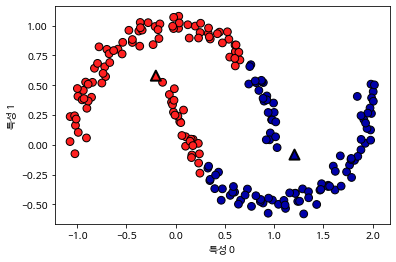

In [2]:
# two_moons 데이터를 생성합니다(이번에는 노이즈를 조금만 넣었습니다.)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 두 개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# 클러스터 할당과 클러스터 중심을 표시합니다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2,
            edgecolors='k')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[복잡한 모양의 클러스터를 구분하지 못하는 *k*-평균 알고리즘(k-means algorithm that cannot distinguish between clusters of complex shapes)]

In [4]:
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]
# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# MinMaxScaler를 적용하는 것과 거의 같습니다.
X_people = X_people / 255.
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to impro

Text(0, 0.5, 'nmf')

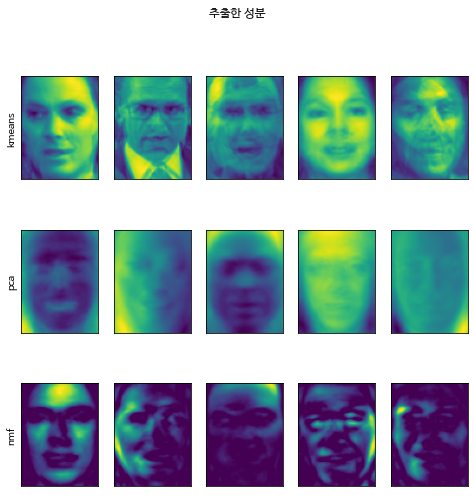

In [8]:
image_shape = people.images[0].shape
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("추출한 성분")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
        axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")

[k-평균의 클러스터 중심과 PCA, NMF로 찾은 성분의 비교]

Text(0, 0.5, 'nmf')

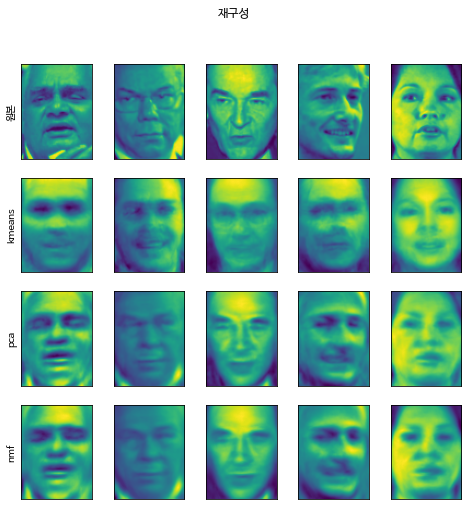

In [9]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("재구성")

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
        axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
        X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
axes[0, 0].set_ylabel("원본")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

[성분(또는 클러스터 중심) 100개를 사용한 *k*-평균, PCA, NMF의 이미지 재구성 비교(*k*-평균은 이미지당 하나의 클러스터 중심만 사용)]

클러스터 레이블:
 [9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


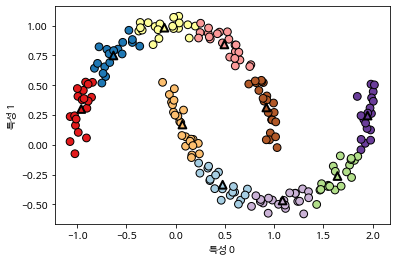

In [11]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired', edgecolors='black')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
            marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
            edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")
print("클러스터 레이블:\n", y_pred)

[복잡한 형태의 데이터셋을 다루기 위해 많은 클러스터를 사용한 *k*-평균(K-means which used many clusters to handle complex types of datasets)]

### 병합 군집(Agglomerative Clustering)
* 병합 군집 알고리즘은 시작할 때 각 포인트를 하나의 클러스터로 지정하고, 그 다음 어떤 종료 조건을 만족할 때까지 가장 비슷한 두 클러스터를 합쳐나갑니다.

#### ward
* 기본값인 ward 연결(linkage)은 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합칩니다. 그래서 크기가 비교적 비슷한 클러스터가 만들어집니다.

#### average
* average 연결은 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합칩니다.

#### complete
* complete 연결(최대 연결이라고도 합니다)은 클러스터 포인트 사이의 최대 거리가 가장 짧은 두 클러스터를 합칩니다.

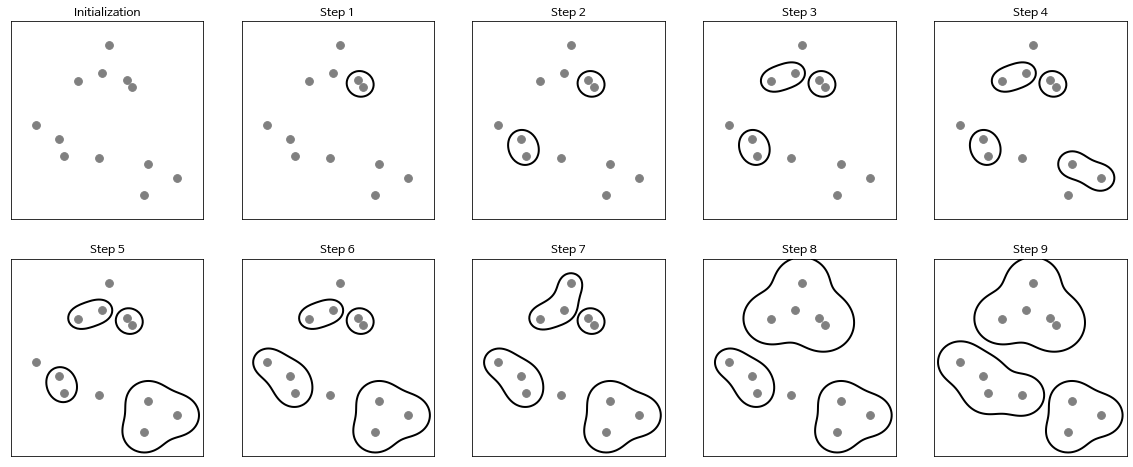

In [4]:
import mglearn
mglearn.plots.plot_agglomerative_algorithm()

[두 인접 클러스터를 반복적으로 합쳐나가는 병합 군집(Merge clusters that repeatedly merge two adjacent clusters)]

Text(0, 0.5, '특성 1')

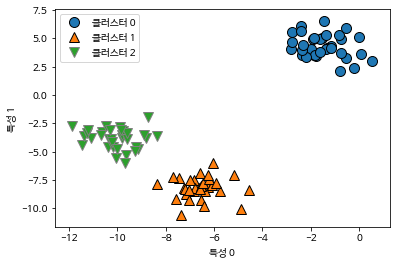

In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import mglearn

X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.legend(["클러스터 0", "클러스터 1", "클러스터 2"], loc="best")
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[병합 군집을 사용한 세 개의 클러스터 할당(assign three clusters by using merge clusters)]

#### 계층적 군집과 덴드로그램(Hierarchical Clustering and Dendrogram)

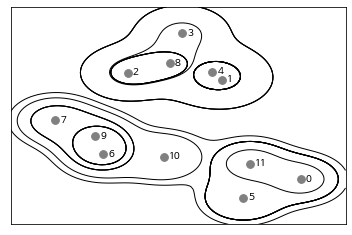

In [3]:
mglearn.plots.plot_agglomerative()

[병합 군집으로 생성한 계층적 군집(실선으로 표시)과 번호가 매겨진 데이터 포인트(Hierarchical clusters which indicated by solid lines and numbered data points which created by merge clusters)]

Text(0, 0.5, '클러스터 거리')

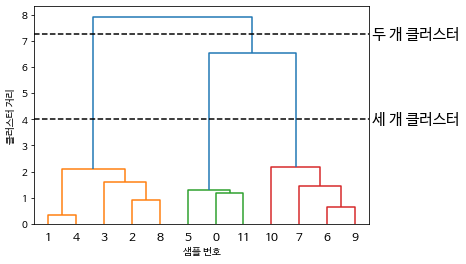

In [6]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다.
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# 데이터 배열 X에 ward 함수를 적용합니다.
# SciPy의 ward 함수는 병합 군집을 수행할 때 생성된
# 거리 정보가 담긴 배열을 반환합니다.
linkage_array = ward(X)
# 클러스터 간의 거리 정보가 담긴 linkage_array를 사용해 덴드로그램을 그립니다.
dendrogram(linkage_array)

# 두 개와 세 개의 클러스터를 구분하는 커트라인을 표시합니다.
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, ' 두 개 클러스터', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' 세 개 클러스터', va='center', fontdict={'size': 15})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

[위 그림에 있는 클러스터의 덴드로그램과 두 개의 클러스터와 세 개의 클러스터를 구분하는 점선(A dotted line that separates the dendrogram of a cluster from two clusters and three clusters)]

### DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n", clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


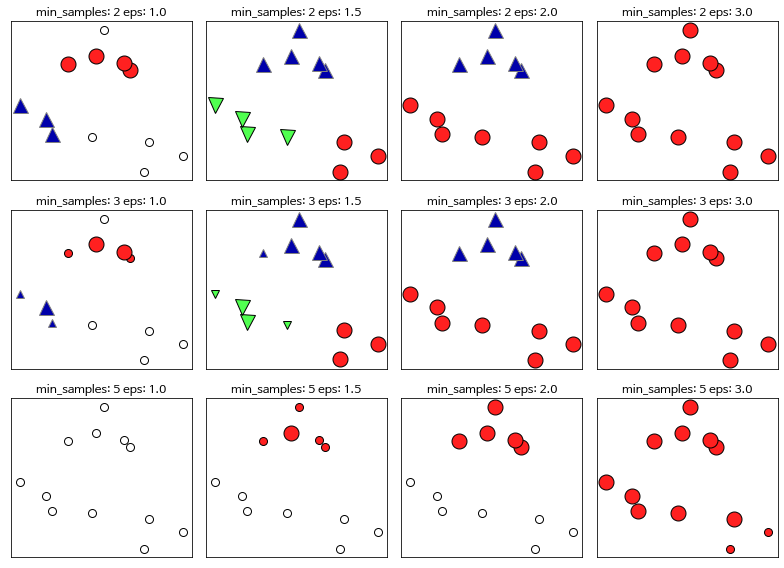

In [9]:
mglearn.plots.plot_dbscan()

[min_samples와 eps 매개변수를 바꿔가며 DBSCAN으로 계산한 클러스터 할당(Cluster assignment which calculated by DBSCAN, replacing min_samples and eps parameters)]

Text(0, 0.5, '특성 1')

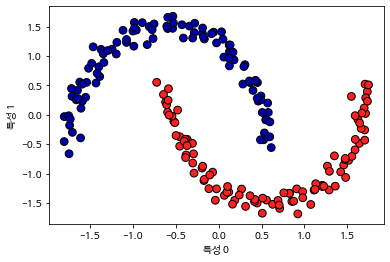

In [13]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 클러스터 할당을 표시합니다.
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60,
            edgecolors='black')
plt.xlabel("특성 0")
plt.ylabel("특성 1")

[기본값 eps=0.5를 사용해 DBSCAN으로 찾은 클러스터 할당(Assign a cluster which found by dbscan using the default eps=0.5)]

### 군집 알고리즘의 비교와 평가

#### 타깃값으로 군집 평가하기

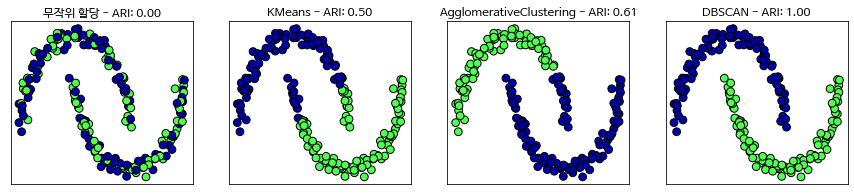

In [18]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans
import numpy as np

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
# 사용할 알고리즘 모델을 리스트로 만듭니다.
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
              DBSCAN()]
# 비교를 위해 무작위로 클러스터 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# 무작위 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(
     adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그립니다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
               cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
                                           adjusted_rand_score(y, clusters)))

[two_moons 데이터셋에 적용한 무작위 할당, *k*-평균, 병합 군집, DBSCAN의 ARI 점수 비교(Comparison of ARI scores for random assignments, k-means, merge clusters, and DBSCAN which applied to the two_moons dataset)]

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics.cluster import adjusted_rand_score
# 포인트가 클러스터로 나뉜 두 가지 경우
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# 모든 레이블이 달라졌으므로 정확도는 0입니다.
print("정확도: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# 같은 포인트가 클러스터에 모였으므로 ARI는 1입니다.
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도: 0.00
ARI: 1.00


#### 타깃값 없이 군집 평가하기
* 타깃값이 필요 없는 군집용 지표로 실루엣 계수(Silhouette coefficient)가 있습니다. 그러나 이 지표는 실제로 잘 동작하진 않습니다. 실루엣 점수는 클러스터의 밀집 정도를 계산하는 것으로, 높을수록 좋으며 최대 점수는 1입니다. 밀집된 클러스터가 좋긴 하지만 모양이 복잡할 때는 밀집도를 활용한 평가가 잘 들어맞지 않습니다.
* 다음은 two_moons 데이터셋에서 실루엣 점수를 사용해 *k*-평균, 병합 군집, DBSCAN의 결과를 비교한 예입니다.

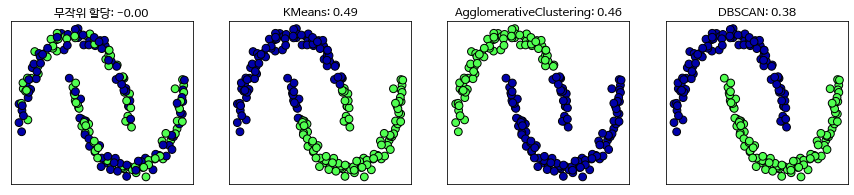

In [13]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import mglearn
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정합니다.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                         subplot_kw={'xticks': (), 'yticks': ()})
# 비교를 위해 무작위로 클러스터 할당합니다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

# 무작위 할당한 클러스터를 그립니다.
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
                cmap=mglearn.cm3, s=60, edgecolors='black')
axes[0].set_title("무작위 할당: {:.2f}".format(
        silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # 클러스터 할당과 클러스터 중심을 그립니다.
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__,
                                     silhouette_score(X_scaled, clusters)))

[two_moons 데이터셋에 적용한 무작위 할당, 병합 군집, DBSCAN의 실루엣 점수 비교(Comparison of silhouette scores for random assignments, merge clusters, and DBSCAN which applied to two_moons datasets). 더 나은 군집을 만든 DBSCAN의 실루엣 점수가 *k*-평균보다 낮음]

#### 얼굴 데이터셋으로 군집 알고리즘 비교(Comparing cluster algorithms with face datasets)
* LFW 데이터셋에 k-평균, DBSCAN, 병합 군집 알고리즘을 적용해보고 어떤 클러스터를 찾았는지 확인해보겠습니다. PCA(whiten=True)로 생성한 100개의 주성분, 즉 고유얼굴을 입력 데이터로 사용해보겠습니다.

In [15]:
# LFW 데이터에서 고유얼굴을 찾은 다음 데이터를 변환합니다.
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
import numpy as np
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

c:\users\wnstj\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


#### DBSCAN으로 얼굴 데이터셋 분석하기
* 군집 알고리즘 마지막에 보았던 DBSCAN을 먼저 적용해보겠습니다.

In [16]:
# 기본 매개변수로 DBSCAN을 사용합니다.
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


* 레이블이 -1뿐이므로 모든 데이터가 DBSCAN에 의해 잡음 포인트로 레이블되었습니다. 바꿀 수 있는 것이 두 가지 있습니다. eps 값을 크게 하여 각 포인트의 이웃을 늘릴 수 있고 min_scamples 값을 낮추어 클러스터에 모을 포인트 수를 줄일 수 있습니다. min_samples를 먼저 바꿔보겠습니다.

In [17]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1]


* 클러스터의 최소 포인트를 3으로 줄여도 모두 잡음 포인트로 레이블되었습니다. 그러면 eps를 키워보겠습니다.

In [18]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블:", np.unique(labels))

고유한 레이블: [-1  0]


* eps를 15로 크게 늘렸더니 클러스터 하나와 잡음 포인트를 얻었습니다. 이 결과에서 데이터의 나머지와 비교해 잡음이 어떤 것인지 확인해보겠습니다. 상황을 더 잘 이해하기 위해 잡음 포인트가 몇 개인지, 클러스터에 속한 포인트가 몇 개인지 보겠습니다.

In [19]:
# 잡음 포인트와 클러스터에 속한 포인트 수를 셉니다.
# bincount는 음수를 받을 수 없어서 labels에 1을 더했습니다.
# 반환값의 첫 번째 원소는 잡음 포인트의 수입니다.
print("클러스터별 포인트 수", np.bincount(labels + 1))

클러스터별 포인트 수 [  31 2032]


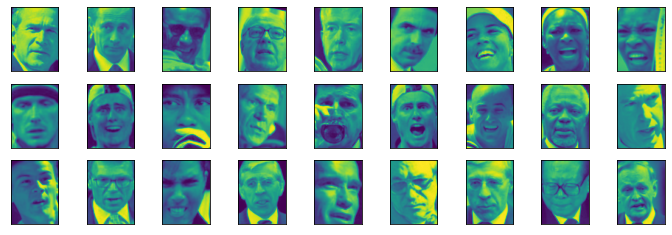

In [21]:
import matplotlib.pyplot as plt
image_shape = people.images[0].shape
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

[얼굴 데이터셋에서 DBSCAN이 잡음 포인트로 레이블한 샘플(Samples which labeled by dbscan as noise points in the face dataset)]

In [22]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps=", eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print("클러스터 수:", len(np.unique(labels)))
    print("클러스터 크기:", np.bincount(labels + 1))


eps= 1
클러스터 수: 1
클러스터 크기: [2063]

eps= 3
클러스터 수: 1
클러스터 크기: [2063]

eps= 5
클러스터 수: 1
클러스터 크기: [2063]

eps= 7
클러스터 수: 14
클러스터 크기: [2003    4   14    7    4    3    3    4    4    3    3    5    3    3]

eps= 9
클러스터 수: 4
클러스터 크기: [1306  751    3    3]

eps= 11
클러스터 수: 2
클러스터 크기: [ 413 1650]

eps= 13
클러스터 수: 2
클러스터 크기: [ 120 1943]


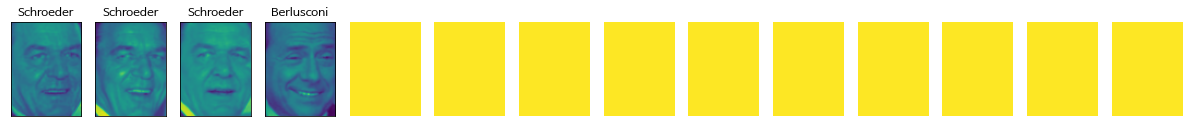

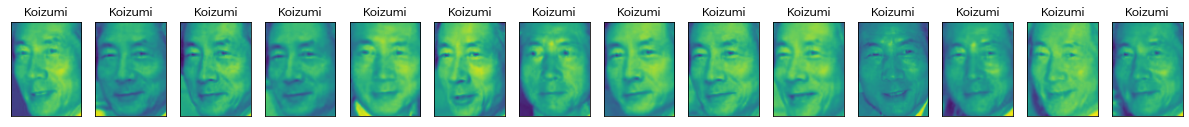

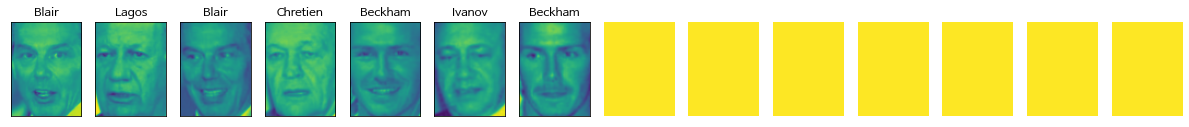

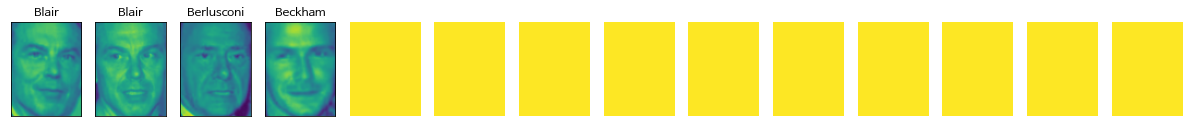

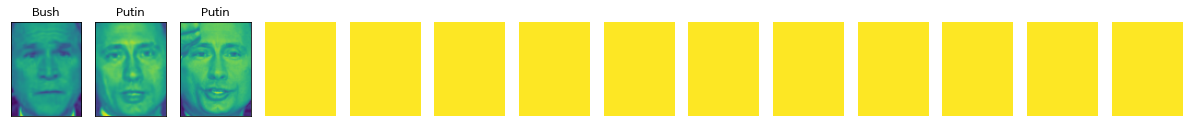

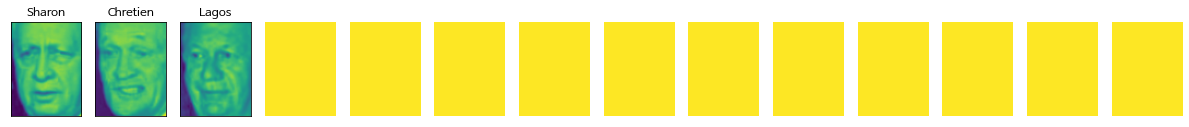

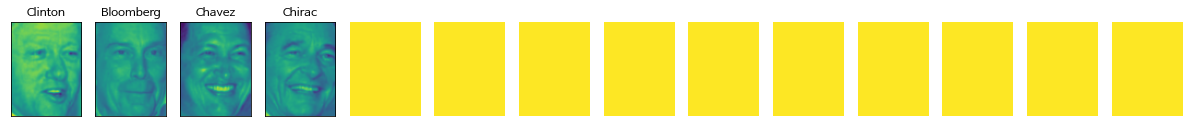

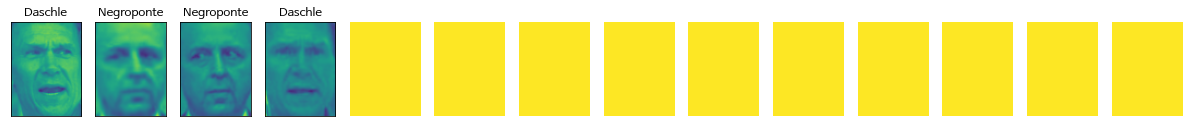

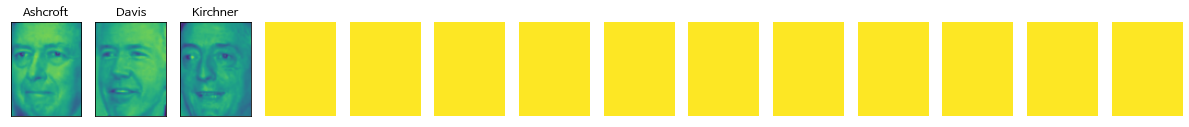

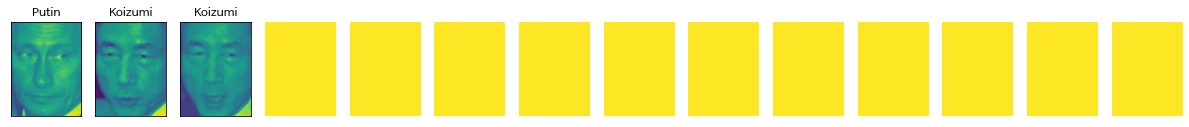

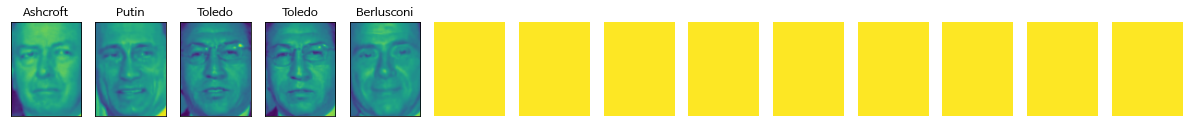

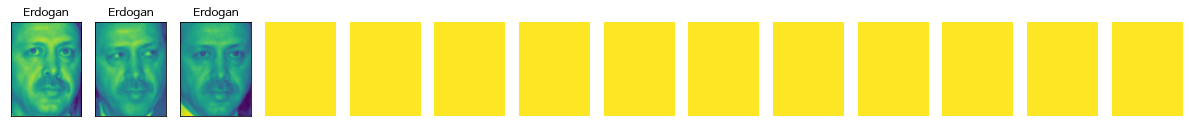

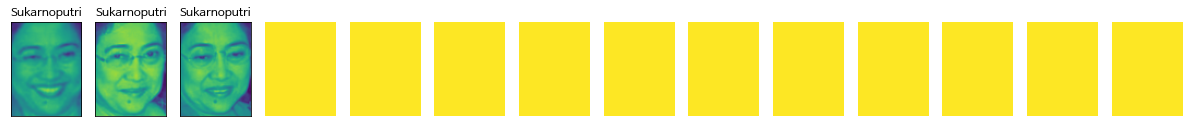

In [23]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize=(14*1.5, 4),
                             subplot_kw={'xticks': (), 'yticks': ()})
    i = 0
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
    for j in range(len(axes) - i):
        axes[j+i].imshow(np.array([[1]*65]*87), vmin=0, vmax=1)
        axes[j+i].axis('off')

[eps=7에서 DBSCAN으로 찾은 클러스터(Cluster which found by DB)]